In [9]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
h = 1
sd = 1
n = 50

def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return(x1,y1,x2,y2)

In [3]:
x1,y1,x2,y2 = gen_data(50,1,1,1.5)

In [4]:
(x1,y1,x2,y2) = gen_data(1000,1.5,1,1.5)

In [5]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

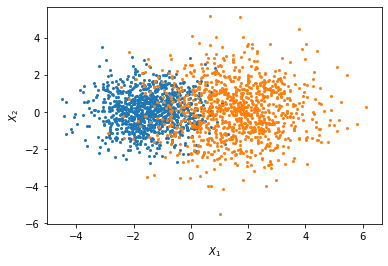

In [10]:
plot_data(x1, y1, x2, y2)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression()

In [16]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))

In [17]:
X.shape

(2000, 2)

In [20]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))

In [21]:
y.shape

(2000,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [24]:
X_test.shape

(1000, 2)

In [25]:
clf.fit(X_train, y_train)

LogisticRegression()

In [26]:
clf.score(X_test, y_test)

0.883

In [29]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.9793654, 0.0206346]])

In [30]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

In [31]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

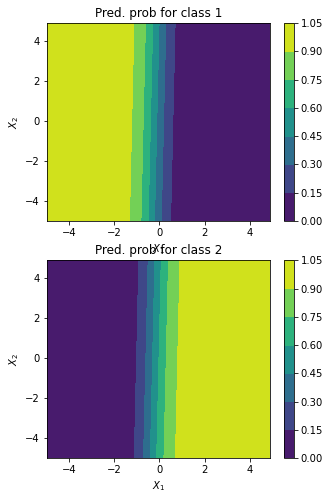

In [32]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");